In [287]:
import pandas as pd

data = pd.read_csv("DataFiles/PruneLatencyNoTraining.csv", header='infer')

In [288]:
def remove_unwated_columns(data):
    return data.drop(['Name', 'Agent', 'Notes', 'User', 'Tags', 'Created', 'Sweep'], axis=1)

def get_rows_with_col_value(data, col, value):
    return data[data[col] == value]

In [289]:
data = remove_unwated_columns(data)
finished_runs = get_rows_with_col_value(data, 'State', 'finished')
finished_runs


,State,Runtime,filter_pruner_20,filter_pruner_40,filter_pruner_60,filter_pruner_70,epochs,learning_rate,Latency,Loss,Throughput,Top1,Top5,Total_Latency
0,finished,37,0.891275,0.840301,0.895867,0.985729,NaN,NaN,3.277,1.888,306.43,25.28,82.85,12.93
1,finished,37,0.730296,0.801089,0.971097,0.981776,NaN,NaN,3.279,1.861,305.91,28.27,82.74,12.89
2,finished,44,0.484452,0.926072,0.939492,0.988535,NaN,NaN,3.296,1.808,306.97,32.86,84.44,12.93
3,finished,38,0.924371,0.983391,0.547082,0.962719,NaN,NaN,3.314,2.070,306.13,26.01,83.01,12.94
4,finished,36,0.494629,0.893945,0.908276,0.971079,NaN,NaN,3.319,1.875,293.56,29.74,84.40,12.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,finished,40,0.164268,0.005908,0.015461,0.203389,NaN,NaN,4.432,1.731,300.43,34.30,87.11,13.18
1575,finished,42,0.898849,0.252303,0.029231,0.273782,NaN,NaN,4.434,1.880,299.79,26.30,82.15,13.04
1576,finished,50,0.450474,0.278031,0.610577,0.044756,NaN,NaN,4.448,2.089,303.99,19.28,76.51,12.99
1577,finished,39,0.351214,0.387067,0.286195,0.027830,NaN,NaN,4.453,1.816,297.79,30.40,84.35,13.00


In [290]:
# Count number of failed experiements
# Count number of experiments with a top1==100/|classes|
# Remove name, agent, notes, user, tags, created, sweep columns
# Find how reducing the inference latency effects the total latency

In [291]:
latency_data = finished_runs.drop(['State', 'Runtime', 'epochs', 'learning_rate'], axis=1)
latency_data

,filter_pruner_20,filter_pruner_40,filter_pruner_60,filter_pruner_70,Latency,Loss,Throughput,Top1,Top5,Total_Latency
0,0.891275,0.840301,0.895867,0.985729,3.277,1.888,306.43,25.28,82.85,12.93
1,0.730296,0.801089,0.971097,0.981776,3.279,1.861,305.91,28.27,82.74,12.89
2,0.484452,0.926072,0.939492,0.988535,3.296,1.808,306.97,32.86,84.44,12.93
3,0.924371,0.983391,0.547082,0.962719,3.314,2.070,306.13,26.01,83.01,12.94
4,0.494629,0.893945,0.908276,0.971079,3.319,1.875,293.56,29.74,84.40,12.93
...,...,...,...,...,...,...,...,...,...,...
1574,0.164268,0.005908,0.015461,0.203389,4.432,1.731,300.43,34.30,87.11,13.18
1575,0.898849,0.252303,0.029231,0.273782,4.434,1.880,299.79,26.30,82.15,13.04
1576,0.450474,0.278031,0.610577,0.044756,4.448,2.089,303.99,19.28,76.51,12.99
1577,0.351214,0.387067,0.286195,0.027830,4.453,1.816,297.79,30.40,84.35,13.00


In [292]:


# Correlation between Inference Latency and the Total Latency
il_tl_corr = latency_data['Latency'].corr(latency_data['Total_Latency'])

# Correlations between each pruner and the inference Latency
fp_20_corr = latency_data['filter_pruner_20'].corr(latency_data['Latency'])
fp_40_corr = latency_data['filter_pruner_40'].corr(latency_data['Latency'])
fp_60_corr = latency_data['filter_pruner_60'].corr(latency_data['Latency'])
fp_70_corr = latency_data['filter_pruner_70'].corr(latency_data['Latency'])

correlations = pd.DataFrame([(fp_20_corr, fp_40_corr, fp_60_corr, fp_70_corr, il_tl_corr)], columns=['fp_20', 'fp_40', 'fp_60', 'fp_70', 'latency_to_total'])
correlations

,fp_20,fp_40,fp_60,fp_70,latency_to_total
0,-0.11259,-0.552583,-0.40775,-0.80726,0.31715


In [293]:
# Correlation between Latency and top1
t1_il_corr = latency_data['Latency'].corr(latency_data['Top1'])

# Correlations between each pruner and Top1
t1_fp_20_corr = latency_data['filter_pruner_20'].corr(latency_data['Top1'])
t1_fp_40_corr = latency_data['filter_pruner_40'].corr(latency_data['Top1'])
t1_fp_60_corr = latency_data['filter_pruner_60'].corr(latency_data['Top1'])
t1_fp_70_corr = latency_data['filter_pruner_70'].corr(latency_data['Top1'])

t1_correlations = pd.DataFrame([(t1_fp_20_corr, t1_fp_40_corr, t1_fp_60_corr, t1_fp_70_corr, t1_il_corr)], columns=['fp_20', 'fp_40', 'fp_60', 'fp_70', 'latency_to_Top1'])
t1_correlations


,fp_20,fp_40,fp_60,fp_70,latency_to_Top1
0,0.004462,-0.071923,-0.104505,-0.152767,0.090325


In [294]:
import matplotlib.pyplot as plt
import numpy as np
import math

str_to_index = {'Latency': 4, 'Loss': 5, 'Throughput': 6, 'Top1': 7, 'Top5': 8, 'Total_Latency': 9}

def build_line(nparray, col_index, against_index):
    x_vals = nparray[:,col_index]
    y_vals = nparray[:,against_index]
    return zip(*sorted(zip(x_vals, y_vals))) # x and y values, sorted by x


def plot_pruners(dataframe, against: str, title):
    # X axis will be 0 - 1 float of pruner setting
    # Y axis is the against string

    bin_var = 0.02

    y_axis_index = str_to_index.get(against)
    if y_axis_index is None:
        raise ValueError('Againt value not mapped')

    fp_20 = sorted(build_line(dataframe.to_numpy(), 0, y_axis_index))
    x, y, z, w = bin_to_param_step(fp_20, bin_var)
    fp_20 = zip(x.tolist(), y.tolist())

    fp_40 = sorted(build_line(dataframe.to_numpy(), 1, y_axis_index))
    x, y, z, w = bin_to_param_step(fp_40, bin_var)
    fp_40 = zip(x.tolist(), y.tolist())

    fp_60 = sorted(build_line(dataframe.to_numpy(), 2, y_axis_index))
    x, y, z, w = bin_to_param_step(fp_60, bin_var)
    fp_60 = zip(x.tolist(), y.tolist())

    fp_70 = sorted(build_line(dataframe.to_numpy(), 3, y_axis_index))
    x, y, z, w = bin_to_param_step(fp_70, bin_var)
    fp_70 = zip(x.tolist(), y.tolist())

    fig, ax = plt.subplots(figsize=(20,10))
    ax.plot(*zip(*fp_20), label='Filter Pruner Layer 1')
    ax.plot(*zip(*fp_40), label='Filter Pruner Layer 2')
    ax.plot(*zip(*fp_60), label='Filter Pruner Layer 3.1')
    ax.plot(*zip(*fp_70), label='Filter Pruner Layer 3.2')

    ax.set_title(title, fontsize=25)
    ax.set_ylabel(against, fontsize=20)
    ax.set_xlabel('Pruning target sparsity', fontsize=20)

    ax.legend(prop={"size":16})
    plt.tight_layout()
    plt.show()




def bin_to_param_step(data, step_size: float):
    assert step_size < 1
    assert step_size > 0
    assert 100%(step_size*100) == 0

    x, y = data
    value = np.array(y)
    parameter = np.array(x)

    num_groups = math.floor(100 / (step_size*100))

    binned_mean_value = np.zeros(num_groups)
    binned_max_value = np.zeros(num_groups)
    binned_min_value = np.zeros(num_groups)
    binned_parameters = np.zeros(num_groups)


    for i in range(num_groups):
        start = i * 1/num_groups
        stop = start + 1/num_groups
        # get the min within start & stop. value, not index

        indices = np.intersect1d(np.where(parameter > start), np.where(parameter < stop))

        binned_mean_value[i] = np.mean(value[indices])
        if len(indices) > 0:
            binned_max_value[i] = np.amax(value[indices])
            binned_min_value[i] = np.amin(value[indices])
        binned_parameters[i] = start

    return binned_parameters, binned_mean_value, binned_max_value, binned_min_value


def bin_data(data, target_num_groups):
    x, y = data
    data_per_bin = int(math.ceil(len(x)/target_num_groups))
    value = np.array(y)
    parameter = np.array(x)
    
    binned_mean_value = np.zeros(target_num_groups)
    binned_max_value = np.zeros(target_num_groups)
    binned_min_value = np.zeros(target_num_groups)
    binned_parameters = np.zeros(target_num_groups)

    actual_groups = 0

    for i in range(target_num_groups):
        start = i * data_per_bin
        stop = start + data_per_bin - 1
        if (stop > len(x)):
            actual_groups = i
            break
        else:
            actual_groups = i
        binned_mean_value[i] = np.mean(value[start : stop])
        binned_max_value[i] = np.amax(value[start : stop])
        binned_min_value[i] = np.amin(value[start : stop])
        binned_parameters[i] = np.mean(parameter[start : stop])

    binned_mean_value = binned_mean_value[0:actual_groups]
    binned_max_value = binned_max_value[0:actual_groups]
    binned_min_value = binned_min_value[0:actual_groups]
    binned_parameters = binned_parameters[0:actual_groups]

    return binned_parameters, binned_mean_value, binned_max_value, binned_min_value



In [295]:
100%5

0

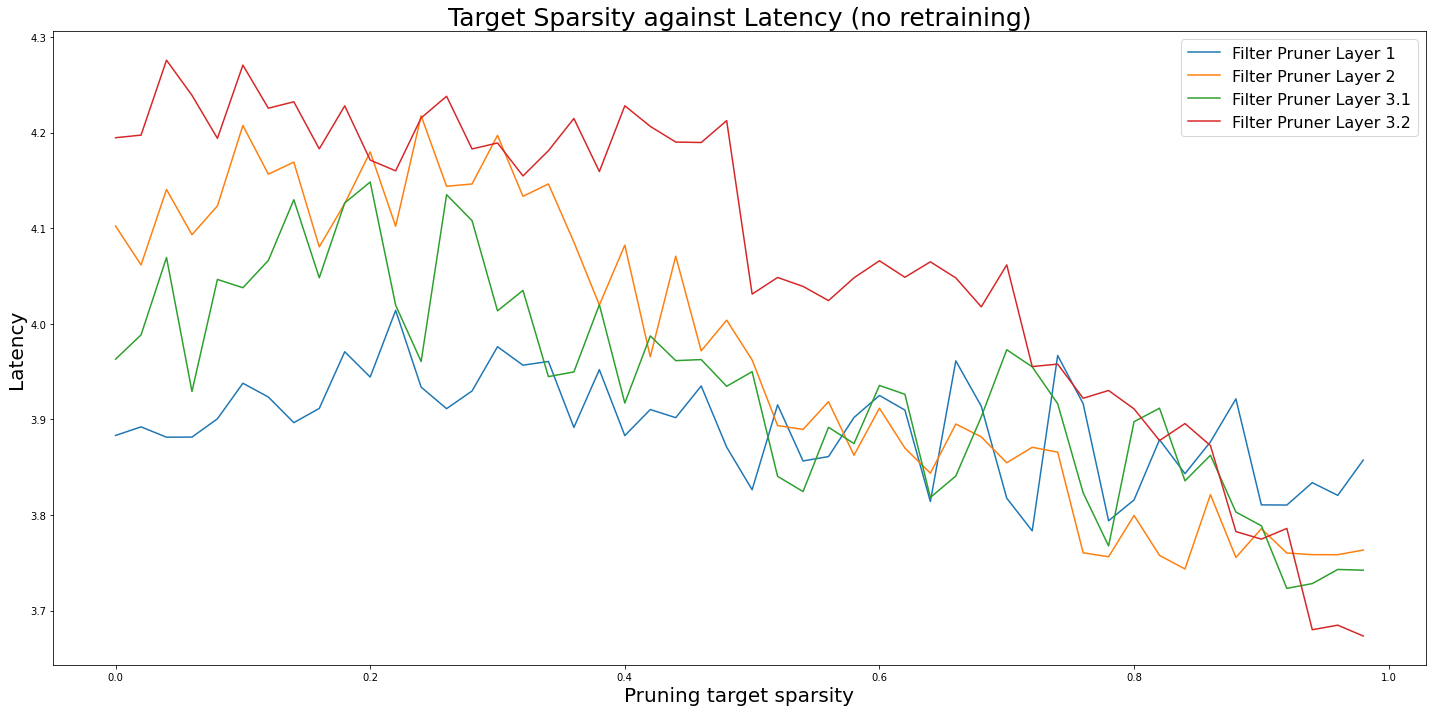

In [296]:
plot_pruners(latency_data, 'Latency', 'Target Sparsity against Latency (no retraining)')

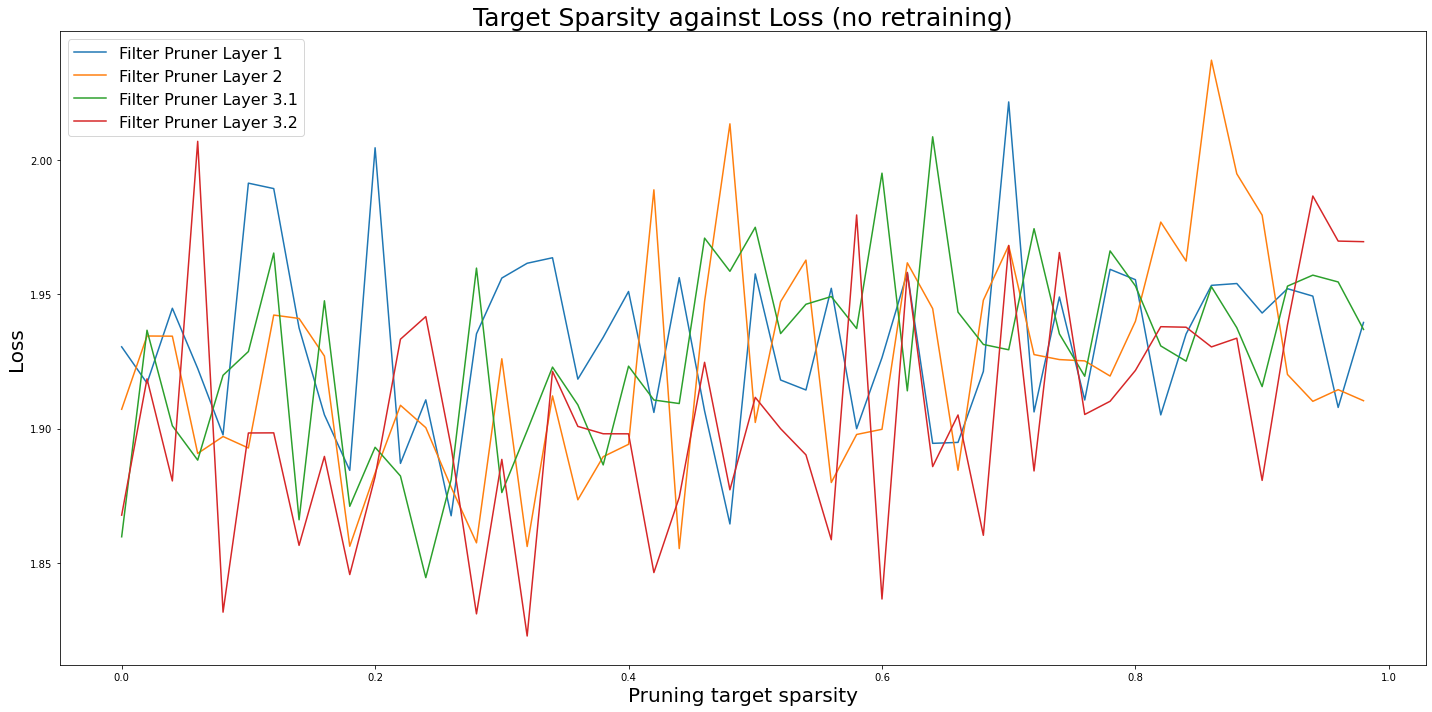

In [297]:
plot_pruners(latency_data, 'Loss', 'Target Sparsity against Loss (no retraining)')

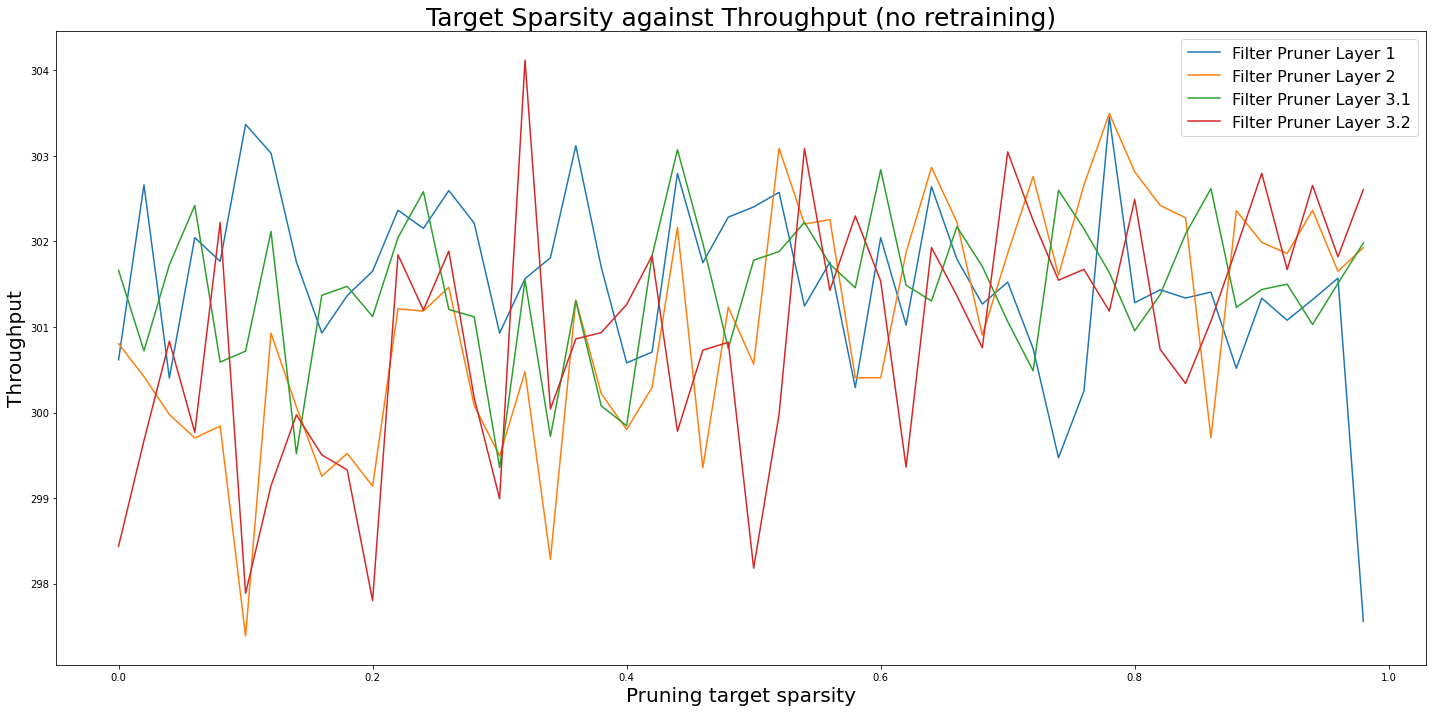

In [298]:
plot_pruners(latency_data, 'Throughput', 'Target Sparsity against Throughput (no retraining)')

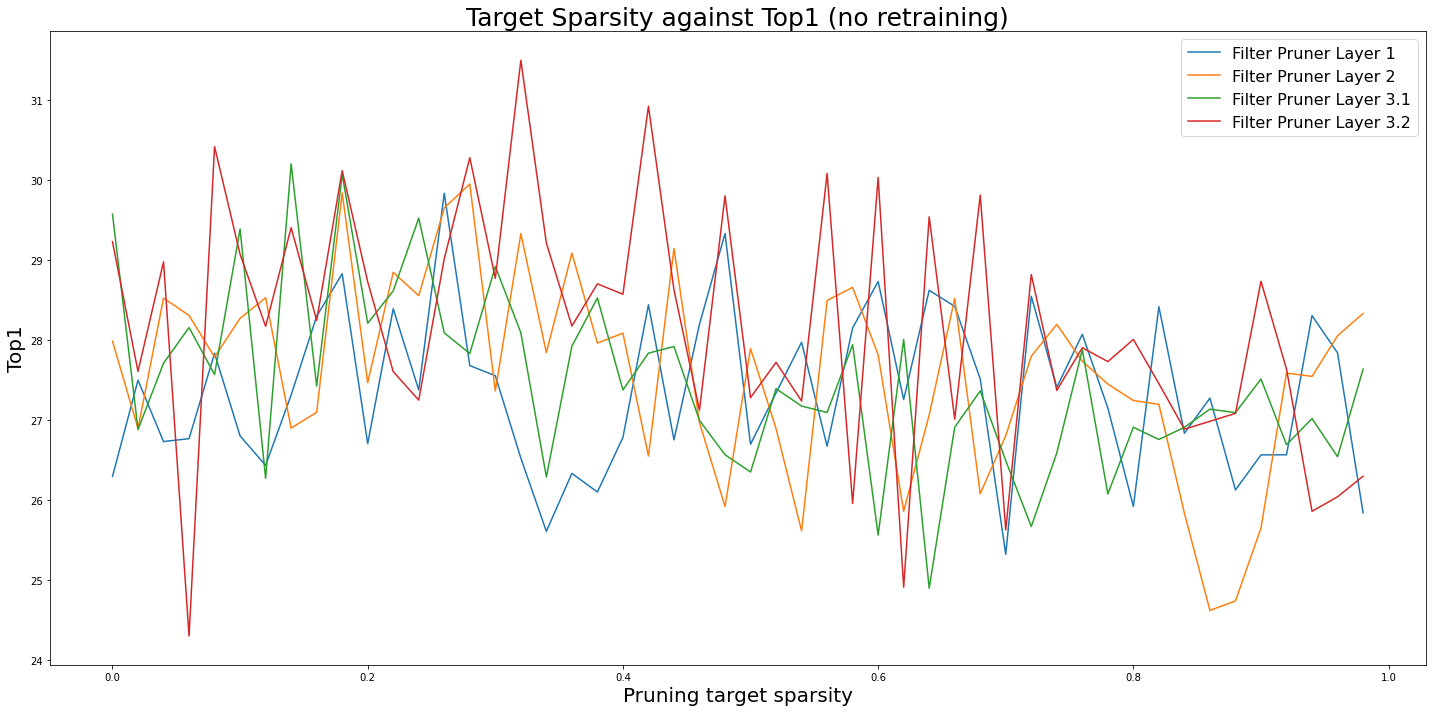

In [299]:
plot_pruners(latency_data, 'Top1', 'Target Sparsity against Top1 (no retraining)')

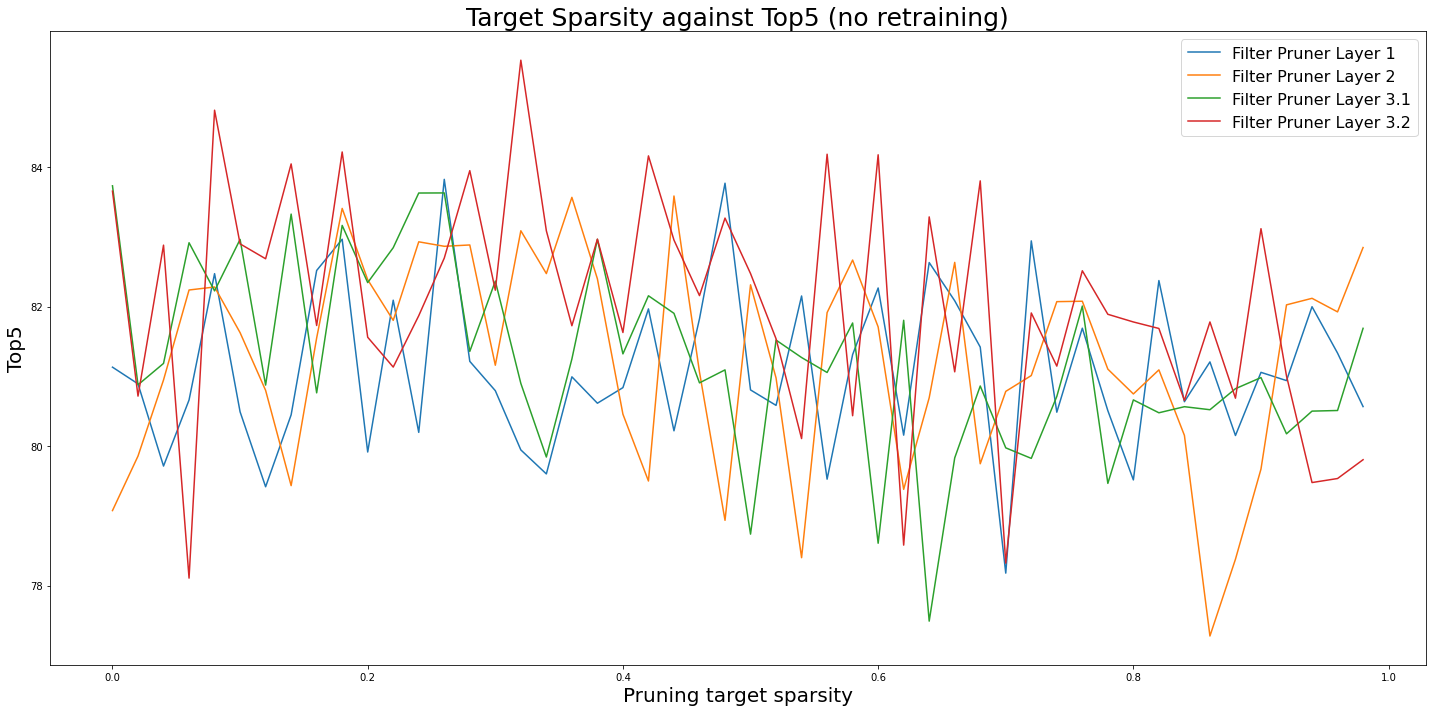

In [300]:
plot_pruners(latency_data, 'Top5', 'Target Sparsity against Top5 (no retraining)')

In [301]:
arr = np.array([11, 12, 13, 14, 15, 16, 17, 15, 11, 12, 14, 15, 16, 17])
result = np.where(arr > 12)
res = np.where(arr < 17)
print('Tuple of arrays returned : ', result)
print("Elements with value 15 exists at following indices", result[0], sep='\n')

Tuple of arrays returned :  (array([ 2,  3,  4,  5,  6,  7, 10, 11, 12, 13], dtype=int64),)
Elements with value 15 exists at following indices
[ 2  3  4  5  6  7 10 11 12 13]


In [302]:
arr[result]

array([13, 14, 15, 16, 17, 15, 14, 15, 16, 17])

In [303]:
arr[res]

array([11, 12, 13, 14, 15, 16, 15, 11, 12, 14, 15, 16])

In [304]:
arr[np.intersect1d(result, res)]


array([13, 14, 15, 16, 15, 14, 15, 16])